In [1]:
import numpy as np
import scipy

# Coffee Can Antenna Theoretical Design
To select desired can ranges.

Known parameters
- f = 2.3-2.5 GHz, 𝛌 = 12.5 cm - freespace wavelength, transmission frequency
- Coaxial cable impedance (50 𝝮)

Design parameters
- $\lambda_g$ - guide wavelength
    - As a function of a - radius of can
- h - height/length of antenna probe
- $l$ - distance away from can wall
- $Z_{in}$ = 50 𝝮 - desired input impedance of antenna probe (to match coaxial cable)

## References
- Ref: W.W.S. Lee and E.K.N. Yung, “The Input Impedance of a Coaxial Line Fed Probe in a Cylindrical Waveguide,” IEEE Trans. Microwave Theory and Techniques, Vol. 42, No. 8, August 1994, pp. 1468-1473.
- Ref: N. Marcuvitz, Waveguide Handbook, MIT Radiation Laboratory Series, New York, 1951, pp. 70-71

## Key Equations

### Guide Wavelength in Circular Waveguide

$$\lambda_g = \frac{\lambda}{\sqrt{1-(\frac{\lambda}{3.41 \cdot r})^2}}$$

### Field Components of TE Modes
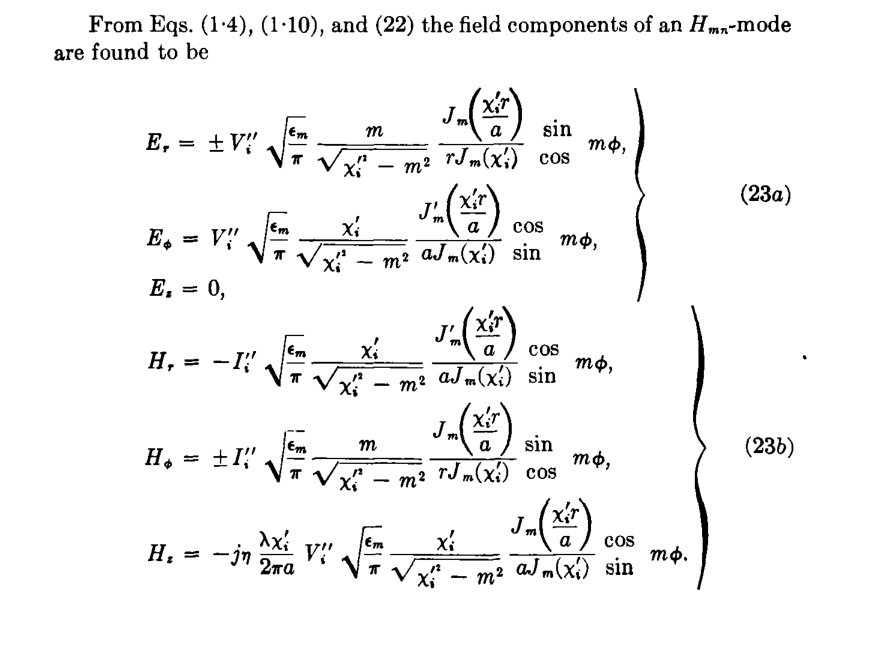

### Field Distribution in Circular Waveguides

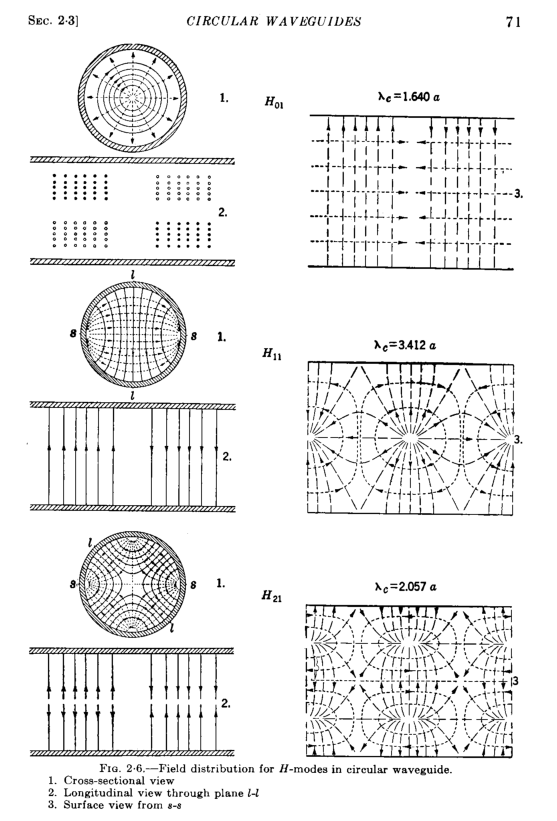

### Cutoff Frequency/Wavelength of Dominant Mode

TE11 mode - 
$$\lambda_c = 3.412 r$$

Next cutoff frequency: TM01 mode
$$\lambda_c = 2.613 r$$



## Desired Can Diameter

The goal is to determine a can diameter range that support **only** the TE11 mode for the frequency band 2.3GHz - 2.5 GHz

In [2]:

def te11_radius(freq):
    return scipy.constants.c / (freq * 3.412)

def tm01_radius(freq):
    return scipy.constants.c / (freq * 2.613)

print(f'Min can diameter @ 2.3 Ghz: {2*te11_radius(2.3e9)*100:.2f} cm')
print(f'Max can diameter @ 2.3 Ghz: {2*tm01_radius(2.3e9)*100:.2f} cm')

print(f'Min can diameter @ 2.5 Ghz: {2*te11_radius(2.5e9)*100:.2f} cm')
print(f'Max can diameter @ 2.5 Ghz: {2*tm01_radius(2.5e9)*100:.2f} cm')

Min can diameter @ 2.3 Ghz: 7.64 cm
Max can diameter @ 2.3 Ghz: 9.98 cm
Min can diameter @ 2.5 Ghz: 7.03 cm
Max can diameter @ 2.5 Ghz: 9.18 cm


Desired Can Diameter Range:
- 7.64 cm to 9.18cm

# Actual Can Design

* I obtained a can of diameter ~ 8.5cm (chicken noodle soup can).
* Length is ~12cm

*Note: will take better measurements in plab*

Based on these params, we can calculate rough range of expected antenna feed offset and height.

$$ f = \frac{c}{\lambda}$$

In [4]:
def calc_waveguide_wavelength(f_freespace, radius):
    lam = scipy.constants.c / f_freespace
    return lam / np.sqrt(1 - (lam/(3.41*radius))**2)

d_cm = 8.5
r_m = d_cm/2 * 1e-2
print(f'Quarter wavelength: {calc_waveguide_wavelength(2.4e9, r_m)/4} cm' )



Quarter wavelength: 0.06158872920060978 cm
